# Python_Exploratory Data Analysis_911 Call Data

#### In this project, I will utilize 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) to perform an exploratory data analysis see what I can find out from this dataset.

## Data and Setup

____
** Import numpy and pandas **

In [98]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

** Read in the csv file as a dataframe called df **

In [188]:
df=pd.read_csv("911.csv")

**check the dataframe columns and the data type**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check what's the dataset looks like **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### 1. Explore the dataset with some basic questoins .

** What are the top 5 zipcodes for 911 calls? **

In [17]:
df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the button 5 townships (twp) for 911 calls? **

In [18]:
df["twp"].value_counts().tail(5)

BRYN ATHYN       173
SALFORD          163
GREEN LANE        51
PHILA COUNTY      43
LEHIGH COUNTY     30
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [22]:
df["title"].nunique()

110

## Analyze Reasons of 911 calls

#### From observation of the dataframe columns "title“，I found that in this column the call was recorded in "Departments/reasons" format to. Departments are EMS, Fire, and Traffic. To better analyze the dataset, I would like to create a new column to store the reasons of the call and the dapartment code into different columns.


#### Seperate the department code from the title column use split and apply method, store the department code into a new column

In [189]:
df["Dept"]=df["title"].apply(lambda title:title.split(":")[0])

In [118]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


#### Store the call reasons into a new column

In [190]:
df["reasons"]=df["title"].apply(lambda title:title.split(":")[1])

In [120]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


### What are the common reasons for 911 calls ?

In [191]:
df["reasons"].value_counts().sort_values(ascending=False)

 VEHICLE ACCIDENT -              23066
 DISABLED VEHICLE -               7702
 VEHICLE ACCIDENT                 5573
 FIRE ALARM                       5510
 RESPIRATORY EMERGENCY            5112
 CARDIAC EMERGENCY                5012
 FALL VICTIM                      4863
 ROAD OBSTRUCTION -               3144
 SUBJECT IN PAIN                  2687
 HEAD INJURY                      2631
 UNKNOWN MEDICAL EMERGENCY        1874
 SYNCOPAL EPISODE                 1718
 SEIZURES                         1630
 FIRE INVESTIGATION               1478
 GENERAL WEAKNESS                 1464
 ABDOMINAL PAINS                  1436
 ALTERED MENTAL STATUS            1386
 MEDICAL ALERT ALARM              1344
 HEMORRHAGING                     1259
 CVA/STROKE                       1202
 OVERDOSE                         1191
 NAUSEA/VOMITING                  1131
 UNCONSCIOUS SUBJECT              1116
 HAZARDOUS ROAD CONDITIONS -      1086
 GAS-ODOR/LEAK                    1069
 BUILDING FIRE           

#### From above result, I observed that there are duplicate resons. For exmple  "VEHICLE ACCIDENT" and " VEHICLE ACCIDENT  -", both of the reasons are the same, so I would liketo sum them together.

In [192]:
# remove the dash
df["reasons"]=df["reasons"].str.strip("-")

In [193]:
# check the result
df["reasons"].value_counts().head(5)

 VEHICLE ACCIDENT         23066
 DISABLED VEHICLE          7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
Name: reasons, dtype: int64

#### Still see the reasons "vehicle accident" showing twice, I suspect it could because of the white space in the data.

In [194]:
# remove the white space
df["reasons"]=df["reasons"].str.strip()

In [195]:
# check the result
df["reasons"].value_counts().head(5)

VEHICLE ACCIDENT         28639
DISABLED VEHICLE          7703
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
CARDIAC EMERGENCY         5012
Name: reasons, dtype: int64

### Use seaborn to create a plot showing the top 5 reasons of 911 calls.  

#### Createa list with top call reasons

In [148]:
reasons=["VEHICLE ACCIDENT","DISABLED VEHICLE","FIRE ALARM","RESPIRATORY EMERGENCY","CARDIAC EMERGENCY"]

#### filter the dataframe based on the top reasons

In [196]:
df_reasons=df[df["reasons"].isin(reasons)]
df_reasons.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,reasons
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,RESPIRATORY EMERGENCY
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,VEHICLE ACCIDENT
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,VEHICLE ACCIDENT
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,VEHICLE ACCIDENT


Text(0.5,1,'Top 5 Reasons of 911 Calls')

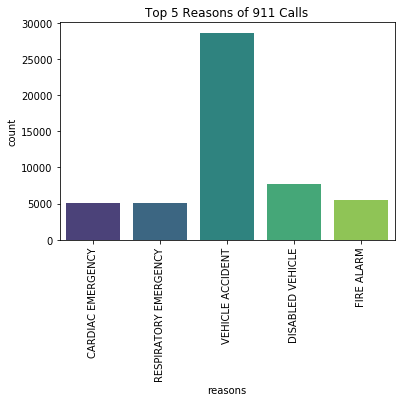

In [197]:
g = sns.countplot(x='reasons',data=df_reasons,palette='viridis')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Top 5 Reasons of 911 Calls")

### How many calls did each department receive?

In [198]:
df["Dept"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Dept, dtype: int64

### Now I would like to discover the time trend of the 911 calls. Therefore, I will look into the timstamp column,but before i do furhter analysis, I would need to first convert the timestamp column datatype.

In [199]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


#### I would like to create sperate columns to store the call month, day of the week and hour. 

In [252]:
df["hour"]=df["timeStamp"].apply(lambda time:time.hour)
df["dayofweek"]=df["timeStamp"].apply(lambda time:time.dayofweek)
df["month"]=df["timeStamp"].apply(lambda time:time.month)
df["date"]=df["timeStamp"].apply(lambda time:time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,reasons,hour,dayofweek,month,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,3,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,3,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,3,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,3,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,3,12,2015-12-10


#### Then I would like to find out the days of week each call was received. From above time function, I already had a column showing the number day of the week. Then I would like to conver the number o actual day of the week. To do that, i'll first create a dictionary that contains the days of the week.

In [184]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [334]:
df["dayofweek"]=df["dayofweek"].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,reasons,hour,dayofweek,month,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,Thu,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,Thu,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,Thu,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,Thu,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,Thu,12,2015-12-10


#### Great, I have the day of the week column for each call now. Then I would like  to see if there is any relationship between the call responsible department with the day of the week. 

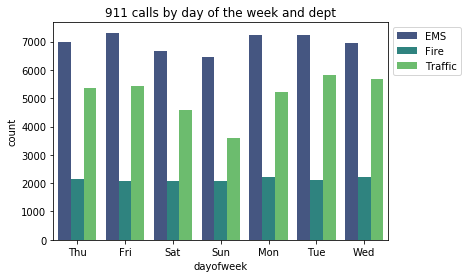

In [237]:
sns.countplot(x='dayofweek',data=df,hue='Dept',palette='viridis').set_title("911 calls by day of the week and dept").set
# relocate the legend to avoid overlapping
plt.legend(bbox_to_anchor=(1, 1),loc='best')

**Now do the same for Month:**

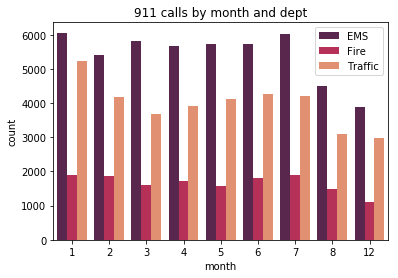

In [239]:
sns.countplot(x='month',data=df,hue='Dept',palette='rocket').set_title("911 calls by month and dept").set
# relocate the legend to avoid overlapping
plt.legend(bbox_to_anchor=(1, 1),loc='best')

#### From the above plot by month, i noticed some of hte months are missing. I will tak another look of the dataset.
 

#### group the dataset by month and save it into a new dataset

In [335]:
df_month=df.groupby('month').count()
df_month.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Dept,reasons,hour,dayofweek,date
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


#### Plot data and regression model fits across a FacetGrid.Use seaborn's lmplot() to create a linear fit on the number of calls per month from the new dataset df_month 

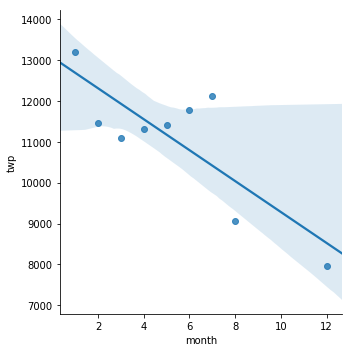

In [336]:
sns.lmplot(x='month',y='twp',data=df_month.reset_index())

____
#### Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. I will use two method to create the dataframe for headmapping plot.  

#### Method 1: groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.  

In [337]:
# Group dataset by day of week column and hour column, similar to pivot table
df.groupby(by=['dayofweek','hour']).count()['Dept']

dayofweek  hour
Fri        0        275
           1        235
           2        191
           3        175
           4        201
           5        194
           6        372
           7        598
           8        742
           9        752
           10       803
           11       859
           12       885
           13       890
           14       932
           15       980
           16      1039
           17       980
           18       820
           19       696
           20       667
           21       559
           22       514
           23       474
Mon        0        282
           1        221
           2        201
           3        194
           4        204
           5        267
                   ... 
Tue        18       905
           19       731
           20       647
           21       571
           22       462
           23       274
Wed        0        250
           1        216
           2        189
           3        209


#### Similarto pivot table function, I woud like to keep the dayofweek column as row index and hour as the columns

In [338]:
df_heat=df.groupby(by=['dayofweek','hour']).count()['Dept'].unstack()
df_heat.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

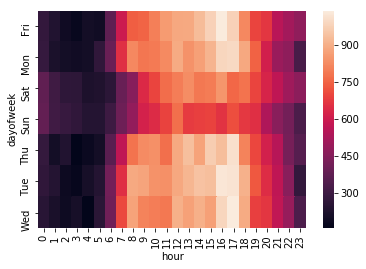

In [339]:
sns.heatmap(df_heat)

#### Method 2: use pivot table function to pivot original dataset. 

In [340]:
df_heat_2=df.pivot_table(index='dayofweek',columns='hour',values='Dept',aggfunc=np.count_nonzero)
df_heat_2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


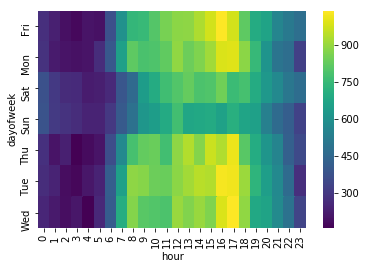

In [341]:
sns.heatmap(df_heat_2,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [342]:
df_month_heat=df.pivot_table(index='dayofweek',columns='month',values='Dept',aggfunc=np.count_nonzero)
df_month_heat.head()

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


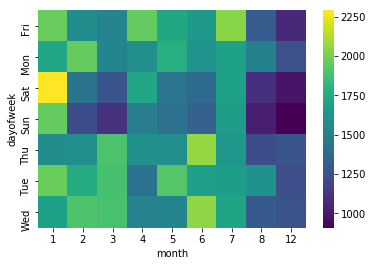

In [343]:
sns.heatmap(df_month_heat,cmap='viridis')